In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import collections as coll 
import random
from time import time
from timeit import timeit
from scipy.interpolate import interp1d 
from scipy.optimize import curve_fit
import statistics

## Modelo inicial de crecimiento

In [ ]:
tiempo_inicial = time()# libreria para calcular el tiempo de ejecución  
#-------------------------------------------------------------------------------
#variables 
s=[]#para guardar los tiempos aleatorios de replicacion
R=0 
celulas=[] # guarda el numero total de células 
zi=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]# matrix inicial  
t=0 # tiempo que ha pasado  
tr=[]#lista para guardar t (t}iempo total )
m=19 # para definir la generacion en la que se mueren las células  
muertes=0# variable para contabilizar el número de células no viables 
fraccion=[] # guarda la fracción de células viables 
r=0 # crecimiento per capita
g=15 #número de generaciones que crece la población 
#------------------------------------------------------------------------------- 
for j in range(g):# número de iteraciones o numero de generaciones la cual se va realizar 
  zf=np.zeros(m,dtype=np.int64) # tiene que tener una longitud definida la cual sera la generacion en la que se mueran las celulas
  for i in range(m-1):  
    zf[i+1]= zi[i]
    zf[0]=sum(zi)-zi[-1]
  zi=zf
#-------------------------------------------------------------------------------
  R=R+120
  s.append(R)
  celulas.append(sum(zi)) 
#-------------------------------------------------------------------------------
  t=t+max(s)    # tiempo total trascurrido 
  tr.append(t)
#-------------------------------------------------------------------------------
#calculos 
  muertes=muertes+zf[-1]#para guardas las celulas muertas
  total_celulas= sum(zi)+muertes #total de celulas teniendo en cuenta las muertes para sacar la fraccion de celulas viables 
  fraccion_viables= (sum(zi)-zi[-1])/total_celulas
  fraccion.append(fraccion_viables)
  r=zi[0]-muertes # numero de nacimientos menos numero de muertes 
#-------------------------------------------------------------------------------
  print(zi)
  #print('s',s)
  #print('tiempo',t)
  #print('lista tiempo',tr)
  print('No viable', muertes)
  #print('Crecimiento per capita', r)
  #print('Células viables', celulas)
  #print('Total celulas',total_celulas)
  #print('Fraccion de células viables',fraccion_viables)
  #print('Lista de fracción de células viables', fraccion)
  print('---------------')
#-------------------------------------------------------------------------------
print(len(zi))
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('tiempo de ejecucion',tiempo_ejecucion)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[4 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[8 4 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
No viable 0
---------------
[32 16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
No viable 0
---------------
[64 32 16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0]
No viable 0
---------------
[128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0   0   0
   0]
No viable 0
---------------
[256 128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0   0
   0]
No viable 0
---------------
[512 256 128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0
   0]
No viable 0
---------------
[1024  512  256  128   64   32   16    8    4    2    1    1    0    0
    0    0    0    0    0]
No viable 0
---------------
[2048 1024  512  256

In [ ]:
indice=[]#edades
ind=-1
for i in range(len(zi)):
  ind=ind+1
  indice.append(ind)
print(indice)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


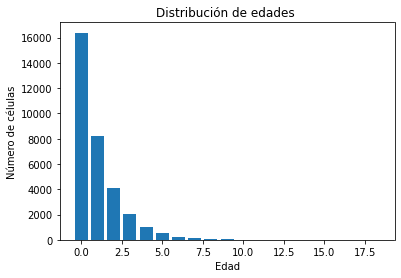

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel('Número de células')
ax.set_xlabel('Edad')
ax.set_title('Distribución de edades ')
plt.bar(indice, zi)
#plt.savefig('barras_simple.png')
plt.show()

In [ ]:
dic= dict(zip(zi,indice))# diccionario que guarda la distribucion {Número de células: edad} 
print(dic) 

{16384: 0, 8192: 1, 4096: 2, 2048: 3, 1024: 4, 512: 5, 256: 6, 128: 7, 64: 8, 32: 9, 16: 10, 8: 11, 4: 12, 2: 13, 1: 15, 0: 18}


In [ ]:
#Probabilidad 
P=[] 
for i in zi:
  p=i/total_celulas 
  P.append(p)
print(P)

[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0, 0.0]


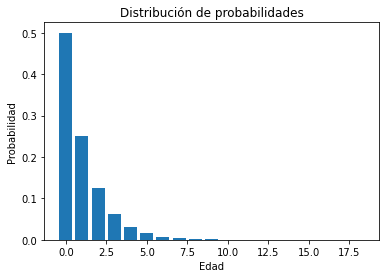

In [ ]:
fig, ax = plt.subplots()  
ax.set_ylabel('Probabilidad')
ax.set_xlabel('Edad')
ax.set_title('Distribución de probabilidades')
plt.bar(indice, P)
#plt.savefig('barras_simple.png')
plt.show()

In [ ]:
#Determina el número de la primera muestra 
muestra=int((total_celulas*0.02)/5)
print(muestra)
print(total_celulas)

131
32768


In [ ]:
#Toma una muestra de edades de segun los pesos probabilisticos y la cantidad hallada anteriormente
sample= random.choices(indice,weights=P,k=muestra)    
print(sample)

[0, 1, 1, 2, 0, 0, 0, 3, 0, 4, 1, 5, 0, 0, 0, 0, 1, 5, 0, 1, 1, 0, 0, 0, 2, 6, 0, 0, 7, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 5, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 5, 1, 4, 3, 3, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 1]


In [ ]:
#Genera un diccionario con la mustra seleccionada {edad: numero de celulas}
print(coll.Counter(sample))

Counter({0: 70, 1: 32, 2: 14, 3: 6, 5: 4, 4: 3, 6: 1, 7: 1})




---



---



In [ ]:
#Para organizar el diccionario 
Dic= coll.Counter(sample)
Dics=sorted(Dic)
print(Dics)

[0, 1, 2, 3, 4, 5, 6, 7]


In [ ]:
valores_ord = coll.OrderedDict(sorted(Dic.items()))
print(valores_ord)
print(valores_ord[0])

OrderedDict([(0, 70), (1, 32), (2, 14), (3, 6), (4, 3), (5, 4), (6, 1), (7, 1)])
70


In [ ]:
#Separa el diccionario en dos listas 
valores=valores_ord.values()
llaves=valores_ord.keys()
Ncell=[]
Edad=[]
for i in valores:
  Ncell.append(i)
print('Numero de celulas',Ncell)
for j in llaves:
  Edad.append(j)
print('Edades',Edad)
print(sum(Ncell))

Numero de celulas [70, 32, 14, 6, 3, 4, 1, 1]
Edades [0, 1, 2, 3, 4, 5, 6, 7]
131


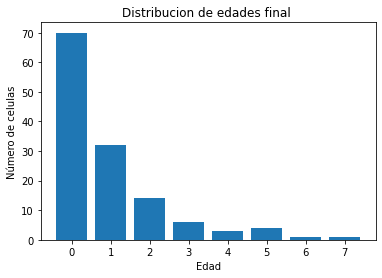

In [ ]:
#Distribucion de edades de la segunda muestra 
fig, ax = plt.subplots()  
ax.set_ylabel('Número de celulas')
ax.set_xlabel('Edad')
ax.set_title('Distribucion de edades final ')
plt.bar(Edad, Ncell)
#plt.savefig('barras_simple.png')
plt.show()

In [ ]:
#para organizar el diccionario en una lista 
inicial1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(Edad)):
  if i==Edad[i]:
    inicial1[i]=Ncell[i]
  else:
    inicial1[Edad[i]]=Ncell[i]
print(inicial1)
print(len(inicial1))

[70, 32, 14, 6, 3, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
25




---



---



## Convolución 

Se vuelve a correr el primer código pero esta vez la matrix inicial va a ser la matrix hallada anteriormente 

In [ ]:
tiempo_inicial = time()  
#-------------------------------------------------------------------------------
#variables 
s_1=[]
R_1=0
celulas_1=[]
t_1=0  
tr_1=[]
m_1=19 
muertes_1=0 
fraccion_1=[]
suma_1=[]
r_1=0 
g_1=10
#------------------------------------------------------------------------------- 
for j_1 in range(g_1): 
  zf_1=np.zeros(m_1,dtype=np.int64) 
  for i_1 in range(m_1 -1):  
    zf_1[i_1+1]= inicial1[i_1]
    zf_1[0]=sum(inicial1)-inicial1[-1]
  inicial1=zf_1
#-------------------------------------------------------------------------------
  muertes_1=muertes_1+zf_1[-1]
  total_celulas_1= sum(inicial1)+muertes_1 
  fraccion_viables_1= (sum(inicial1)-inicial1[-1])/total_celulas_1
  fraccion.append(fraccion_viables_1)
  r_1=inicial1[0]-muertes_1  
#-------------------------------------------------------------------------------
  total_1=sum(inicial1)
  suma_1.append(total_1)
#-------------------------------------------------------------------------------
  print(inicial1)
  #print('s',s)
  #print('tiempo',t)
  #print('lista tiempo',tr)
  print('No viable', muertes_1)
  #print('Crecimiento per capita', r)
  #print('Células viables', total)
  #print('Total de células',total_celulas)
  #print('Fraccion de células viables',fraccion_viables)
  #print('Lista de fracción de células viables', fraccion)
  print('---------------')
#-------------------------------------------------------------------------------
print(len(inicial1))
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('tiempo de ejecucion',tiempo_ejecucion)

[262 131  70  32  14   6   3   4   1   1   0   0   0   0   0   0   0   0
   0]
No viable 0
---------------
[524 262 131  70  32  14   6   3   4   1   1   0   0   0   0   0   0   0
   0]
No viable 0
---------------
[1048  524  262  131   70   32   14    6    3    4    1    1    0    0
    0    0    0    0    0]
No viable 0
---------------
[2096 1048  524  262  131   70   32   14    6    3    4    1    1    0
    0    0    0    0    0]
No viable 0
---------------
[4192 2096 1048  524  262  131   70   32   14    6    3    4    1    1
    0    0    0    0    0]
No viable 0
---------------
[8384 4192 2096 1048  524  262  131   70   32   14    6    3    4    1
    1    0    0    0    0]
No viable 0
---------------
[16768  8384  4192  2096  1048   524   262   131    70    32    14     6
     3     4     1     1     0     0     0]
No viable 0
---------------
[33536 16768  8384  4192  2096  1048   524   262   131    70    32    14
     6     3     4     1     1     0     0]
No viable 0
--------

In [ ]:
edad=[]#edades
ind=-1
for i in range(len(inicial1)):
  ind=ind+1
  edad.append(ind)
print('Edad',edad)

Edad [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


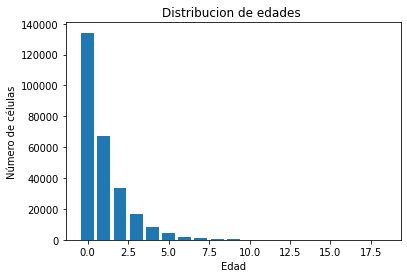

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel('Número de células')
ax.set_xlabel('Edad')
ax.set_title('Distribucion de edades ')
plt.bar(edad, inicial1)
#plt.savefig('Distribución de edades.png')
plt.show()

In [ ]:
#Probabilidad
P_1=[] 
for ii in inicial1:
  p_1=ii/total_celulas_1 
  P_1.append(p_1)
print(P_1)

[0.49999813633805335, 0.24999906816902667, 0.12499953408451334, 0.06249976704225667, 0.031249883521128334, 0.015624941760564167, 0.0078124708802820835, 0.0039062354401410418, 0.0019531177200705209, 0.0009765588600352604, 0.0004882794300176302, 0.0002609126725285047, 0.0001192743645844593, 5.218253450570094e-05, 2.236394335958612e-05, 1.118197167979306e-05, 1.4909295573057412e-05, 3.727323893264353e-06, 3.727323893264353e-06]


In [ ]:
#Segunda muestra, fue el número de células que se estudiaron 
n_cell=180
sample_1= random.choices(edad,weights=P_1,k=n_cell)   
print(sample_1) 

[6, 2, 0, 0, 5, 4, 2, 1, 0, 2, 2, 1, 6, 1, 0, 2, 0, 0, 3, 7, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 1, 2, 2, 3, 0, 0, 3, 0, 0, 2, 0, 2, 0, 4, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 4, 6, 0, 0, 0, 2, 2, 0, 0, 7, 1, 0, 1, 0, 2, 2, 0, 1, 4, 0, 2, 0, 0, 1, 3, 3, 0, 1, 1, 0, 4, 0, 0, 0, 1, 2, 0, 0, 0, 7, 1, 7, 0, 1, 0, 1, 5, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 4, 1, 2, 3, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 6, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1]


In [ ]:
Dic_1= coll.Counter(sample_1)
valores_1=Dic_1.values()
llaves_1=Dic_1.keys()
Ncell_1=[]
Edad_1=[]
for i in valores_1:
  Ncell_1.append(i)
print('Numero de celulas',Ncell_1)
for j in llaves_1:
  Edad_1.append(j)
print('Edades',Edad_1)
print(sum(Ncell_1))

Numero de celulas [4, 28, 85, 2, 8, 43, 6, 4]
Edades [6, 2, 0, 5, 4, 1, 3, 7]
180


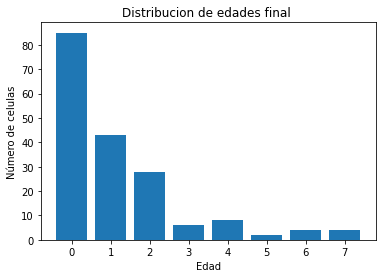

In [ ]:
fig, ax = plt.subplots()  
ax.set_ylabel('Número de celulas')
ax.set_xlabel('Edad')
ax.set_title('Distribucion de edades final ')
plt.bar(Edad_1, Ncell_1)
#plt.savefig('Distribucion de edades .png')
plt.show()



---



---



In [ ]:
#Porcentaje de las edades dentro de la distribucion 
per_cell=[]
for i in range(len(Edad_1)):
  per_c=(Ncell_1[i]*100)/180
  per_cell.append(per_c)
print(per_cell)
print(Edad_1)

[2.2222222222222223, 15.555555555555555, 47.22222222222222, 1.1111111111111112, 4.444444444444445, 23.88888888888889, 3.3333333333333335, 2.2222222222222223]
[6, 2, 0, 5, 4, 1, 3, 7]




---



---



## Datos

In [ ]:
x=[0,11,12,13,14,15,16,17,18,19,21,25,26,27,28,35] # Generaciones
y=[1,1,1,1,1,0.96,0.79,0.58,0.51,0.40,0.34,0,0,0,0,0] # Fracción de células viables 

popt [10.01643518 -0.54299728] pcov [[ 1.54072518 -0.08542983]
 [-0.08542983  0.00478655]]


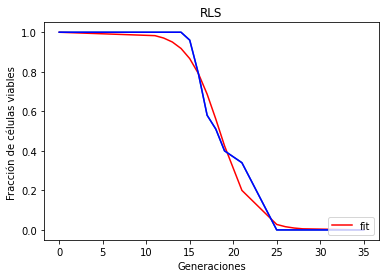

In [ ]:
#fit
xa=np.array(x)
ya=np.array(y)
def fsigmoid(x,a,b):
  return np.exp(a+b*x)/( 1+ np.exp(a+b*x))
xdata = np.linspace(0, 35, 35)
ydata = np.random.normal(size=len(xdata))
popt, pcov = curve_fit(fsigmoid, xa, ya)
a=curve_fit(fsigmoid,xa,ya)
print('popt',popt,'pcov', pcov)
plt.figure()
plt.plot(xa, fsigmoid(xa, *popt), 'r-', label='fit')
plt.plot(x,y)
plt.title('RLS')
plt.ylabel('Fracción de células viables ')
plt.xlabel('Generaciones')
plt.legend(loc=4)
plt.plot(xa, ya, 'b-', label='data')
plt.show()



---



## Simulacion de la curva de envejecimiento


In [ ]:
R=[]#Me crea una lista de numeros aleatorios entre cero y uno 
for i in range(n_cell):
  r=random.random()
  R.append(r)
print(R)
print(len(R))

[0.6930293185006087, 0.12305742803990105, 0.16020791538808687, 0.2843383314600424, 0.08319143480639235, 0.5534588436583601, 0.1811788063512546, 0.3495006291883268, 0.5210040891484451, 0.9779066503487716, 0.9769676122868691, 0.8153287127946869, 0.5898656839470493, 0.8581122079451363, 0.7316639761169206, 0.04253629910339296, 0.12147550192812373, 0.7474277592593199, 0.6286466083216604, 0.26403887335372145, 0.9603530494203295, 0.3759973874897494, 0.3584262370439638, 0.2414429604810835, 0.03129983794602853, 0.2184431861106313, 0.9677753915661755, 0.9935469932586452, 0.24552587933642556, 0.7501428271073164, 0.08189503774598084, 0.048670180155151344, 0.6498656739209442, 0.3000844900223145, 0.7041171717567289, 0.4722465326778168, 0.2174083933857196, 0.7164422115077435, 0.9266118461670086, 0.5497132904726686, 0.2635674723922694, 0.5608141439150078, 0.7461475711614528, 0.45220653429049296, 0.07498123540648804, 0.9425503934047137, 0.2914495560421727, 0.9456813146921395, 0.6192719476671833, 0.3529

La ecuación inversa que utilizo para ajustar la curva 
$$f(x)=\frac{ln\left ( \frac{1-x}{x} \right )-a}{b}$$

In [ ]:
p=[]
def inversa(x,a,b):
  return (np.log((1-x)/x)-a)/b
for i in R:
  p1= inversa(i,popt[0],popt[1])
  p.append(p1)
print(p)

[19.946242036402573, 14.829990974673715, 15.395571090884353, 16.74666295446875, 14.027106799607724, 18.841882477526042, 15.668685876750994, 17.30248105626034, 18.60138405253749, 25.42659636126246, 25.34816970930829, 21.181411898436433, 19.115832888783395, 21.76094404109123, 20.293870445871516, 12.711859503249629, 14.802843850933659, 20.44462442981371, 19.416027705307375, 16.558746227691273, 24.3163686461928, 17.513647138259596, 17.37436666574602, 16.338296175974445, 12.125462073365822, 16.098926390774018, 24.71228718131971, 27.722367706986635, 16.379117961263475, 20.471206203020973, 13.99557988444386, 12.971779240654731, 19.585519706013258, 16.886897779250386, 20.043224459188412, 18.24190910075411, 16.087744898489785, 20.153538812593613, 23.116519709738498, 18.813993790623982, 16.55427611018209, 18.89678339522283, 20.432156485549594, 18.093416228472748, 13.819330727437178, 23.59885914371447, 16.810546100220556, 23.708171156889158, 19.342443622305737, 17.33070596406564, 21.0128359827367

In [ ]:
#RLS promedio 
RLSmean1=statistics.mean(p)
print(RLSmean1)

18.39147631212312


La siguiente celda de código es para restar la distribución de edades hallada, para esto, se divide la lista “p” según la cantidad de edades presentes en la distribución, y la cantidad de elementos dentro de la lista vienen dada por la cantidad de células en cada edad. Luego de esto se resta los valores de la edad a la respectiva lista. 

Es posible que se presente un error cuando hay mas listas definidas que edades en la distribución, cuando suceda esto por favor comentar la lista donde se presenta el error y verificar que la suma sea igual al valor de n_cell 

In [ ]:
p_1=p[0:Ncell_1[0]]
p_2=p[Ncell_1[0]:Ncell_1[1]+Ncell_1[0]]
p_3=p[Ncell_1[1]+Ncell_1[0]:(Ncell_1[2]+Ncell_1[1]+Ncell_1[0])]
p_4=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[0]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[0])]
p_5=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[0]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[0])]
p_6=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[0]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[0])]
p_7=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[0]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[6]+Ncell_1[0])]
p_8=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[6]+Ncell_1[0]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[6]+Ncell_1[0]+Ncell_1[7])]
#p_9=p[(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[6]+Ncell_1[0]+Ncell_1[7]):(Ncell_1[2]+Ncell_1[1]+Ncell_1[3]+Ncell_1[4]+Ncell_1[5]+Ncell_1[6]+Ncell_1[0]+Ncell_1[7]+Ncell_1[8])]
print(len(p_1)+len(p_2)+len(p_3)+len(p_4)+len(p_5)+len(p_6)+len(p_7)+len(p_8))#+len(p_9))

180


In [ ]:
dp_1=[]
for i in range(len(p_1)):
  d=p_1[i]-Edad_1[0]
  dp_1.append(d)
print(dp_1)
len(dp_1)

[13.946242036402573, 8.829990974673715, 9.395571090884353, 10.74666295446875]


4

In [ ]:
dp_2=[]
for i in range(len(p_2)):
  d=p_2[i]-Edad_1[1]
  dp_2.append(d)
print(dp_2)
len(dp_2)

[12.027106799607724, 16.841882477526042, 13.668685876750994, 15.30248105626034, 16.60138405253749, 23.42659636126246, 23.34816970930829, 19.181411898436433, 17.115832888783395, 19.76094404109123, 18.293870445871516, 10.711859503249629, 12.802843850933659, 18.44462442981371, 17.416027705307375, 14.558746227691273, 22.3163686461928, 15.513647138259596, 15.37436666574602, 14.338296175974445, 10.125462073365822, 14.098926390774018, 22.71228718131971, 25.722367706986635, 14.379117961263475, 18.471206203020973, 11.99557988444386, 10.971779240654731]


28

In [ ]:
dp_3=[]
for i in range(len(p_3)):
  d=p_3[i]-Edad_1[2]
  dp_3.append(d)
print(dp_3)
len(dp_3)

[19.585519706013258, 16.886897779250386, 20.043224459188412, 18.24190910075411, 16.087744898489785, 20.153538812593613, 23.116519709738498, 18.813993790623982, 16.55427611018209, 18.89678339522283, 20.432156485549594, 18.093416228472748, 13.819330727437178, 23.59885914371447, 16.810546100220556, 23.708171156889158, 19.342443622305737, 17.33070596406564, 21.01283598273675, 18.79781525717215, 22.458440716145372, 20.829328142966332, 20.745741554460206, 19.49849062730841, 18.088737716115965, 13.793900758174074, 16.784843372943364, 19.60400381889827, 18.85010757622063, 18.166938080045544, 19.922169892743195, 21.259234425092878, 13.957825645976547, 16.639829643185013, 21.022989969882875, 17.18450149576332, 16.16716427073266, 9.830279290504274, 19.297966763812582, 19.468962701738906, 18.786310835572813, 15.699860694379637, 18.783261262704862, 18.02122763999101, 19.458029314961866, 14.317915960288493, 16.78980925504428, 17.618942556380045, 15.363982444902279, 19.52061108486042, 15.015243731920

85

In [ ]:
dp_4=[]
for i in range(len(p_4)):
  d=p_4[i]-Edad_1[3]
  dp_4.append(d)
#dp_4=[dp_3-Edad[3]]
print(dp_4)
len(dp_4)

[14.68214211616667, 19.21448581190409]


2

In [ ]:
dp_5=[]
for i in range(len(p_5)):
  d=p_5[i]-Edad_1[4]
  dp_5.append(d)
print(dp_5)
len(dp_5)

[20.132012038544488, 14.148892614322783, 14.756484027055233, 17.668605251645108, 12.665702445968591, 19.623589651277367, 14.122486238760356, 16.0605630276403]


8

In [ ]:
dp_6=[]
for i in range(len(p_6)):
  d=p_6[i]-Edad_1[5]
  dp_6.append(d)
print(dp_6)
len(dp_6)

[15.299941438358545, 17.818699321623487, 20.637891841382462, 16.42246039749231, 12.001888294273051, 18.38391391217656, 19.38180441663018, 19.33614178827425, 16.348082398542836, 17.96378034248237, 16.497475852561895, 17.3685930306138, 18.070844124644886, 18.662952372003737, 16.98950080335604, 17.661671778160695, 17.822261362386975, 17.527417501885147, 16.039098412464966, 13.976340847483971, 18.948827584979405, 13.02211732596774, 16.734592669328304, 18.433493100764405, 12.675105722113216, 15.500254921594824, 15.1971417289121, 15.667247201460757, 19.948896683368414, 22.605468350128945, 16.08561137854457, 17.216275443465022, 7.566571740469323, 20.27731949280261, 18.608195750981793, 13.184281438116995, 12.940214274488193, 9.898186440377378, 11.93041283368464, 15.127915725973416, 19.590276733834198, 25.21889168182055, 22.106731458629376]


43

In [ ]:
dp_7=[]
for i in range(len(p_7)):
  d=p_7[i]-Edad_1[6]
  dp_7.append(d)
print(dp_7)
len(dp_7)

[11.22058247345875, 11.701056456559623, 16.753601572164044, 11.876389037268646, 18.835902373671917, 11.943177703551243]


6

In [ ]:
dp_8=[]
for i in range(len(p_8)):
  d=p_8[i]-Edad_1[7]
  dp_8.append(d)
print(dp_8)
print(Edad_1[7])
len(dp_8)

[4.0971774443547595, 11.905838818446075, 13.088015782043396, 12.194127283264145]
7


4

In [ ]:
dp_9=[]
for i in range(len(p_9)):
  d=p_9[i]-Edad_1[8]
  dp_9.append(d)
print(dp_9)
len(dp_9)

[14.06081066323198]


1

In [ ]:
listaobservada=dp_1+dp_2+dp_3+dp_4+dp_5+dp_6+dp_7+dp_8#+dp_9
print(listaobservada)
len(listaobservada)

[13.946242036402573, 8.829990974673715, 9.395571090884353, 10.74666295446875, 12.027106799607724, 16.841882477526042, 13.668685876750994, 15.30248105626034, 16.60138405253749, 23.42659636126246, 23.34816970930829, 19.181411898436433, 17.115832888783395, 19.76094404109123, 18.293870445871516, 10.711859503249629, 12.802843850933659, 18.44462442981371, 17.416027705307375, 14.558746227691273, 22.3163686461928, 15.513647138259596, 15.37436666574602, 14.338296175974445, 10.125462073365822, 14.098926390774018, 22.71228718131971, 25.722367706986635, 14.379117961263475, 18.471206203020973, 11.99557988444386, 10.971779240654731, 19.585519706013258, 16.886897779250386, 20.043224459188412, 18.24190910075411, 16.087744898489785, 20.153538812593613, 23.116519709738498, 18.813993790623982, 16.55427611018209, 18.89678339522283, 20.432156485549594, 18.093416228472748, 13.819330727437178, 23.59885914371447, 16.810546100220556, 23.708171156889158, 19.342443622305737, 17.33070596406564, 21.01283598273675,

180

In [ ]:
#RLS promedio 
RLSmean2=statistics.mean(listaobservada)
print(RLSmean2)

17.2192540899009


## Simulación de la curva de RLS sin la distribución de edades  

In [ ]:
l=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]# lista de tiempos en los que se grafica 
d=[] # lista donde se van a guardar los datos de las celulas viables 
for i in x: 
  num=0  
  for j in p:
    if j>i:
      num=num+1
  d.append(num)
print(d)
for i in range(len(d)):  
    d[i] /= len(listaobservada)
print(d)

[180, 177, 175, 171, 162, 149, 143, 120, 104, 75, 31, 6, 3, 2, 0, 0]
[1.0, 0.9833333333333333, 0.9722222222222222, 0.95, 0.9, 0.8277777777777777, 0.7944444444444444, 0.6666666666666666, 0.5777777777777777, 0.4166666666666667, 0.17222222222222222, 0.03333333333333333, 0.016666666666666666, 0.011111111111111112, 0.0, 0.0]


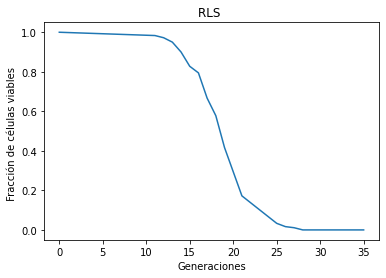

In [ ]:
plt.plot(x,d) 
plt.xlabel('Generaciones')
plt.ylabel(' Fracción de células viables  ')
plt.title('RLS ')
plt.show()

## Simulación de la curva de RLS con la distribución de edades

In [ ]:
l=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,29,30]# lista de tiempos en los que se grafica 
viab=[] # lista donde se van a guardar los datos de las celulas viables 
for i in x:  
  num=0 
  for j in listaobservada:
    if j>i:
      num=num+1
  viab.append(num)
print(viab)
for i in range(len(viab)): 
    viab[i] /= len(listaobservada)
print(viab)

[180, 170, 162, 155, 144, 133, 121, 98, 82, 56, 22, 4, 1, 1, 0, 0]
[1.0, 0.9444444444444444, 0.9, 0.8611111111111112, 0.8, 0.7388888888888889, 0.6722222222222223, 0.5444444444444444, 0.45555555555555555, 0.3111111111111111, 0.12222222222222222, 0.022222222222222223, 0.005555555555555556, 0.005555555555555556, 0.0, 0.0]


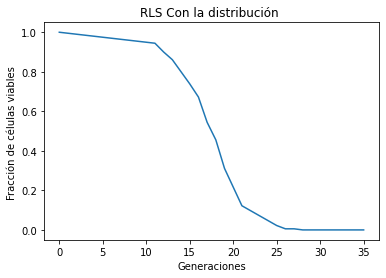

In [ ]:
plt.plot(x,viab) 
plt.xlabel('Generaciones')
plt.ylabel('Fracción de células viables ')
plt.title('RLS Con la distribución ')
plt.show() 

## Comparacion entre las simulaciones de las dos curvas de RLS 

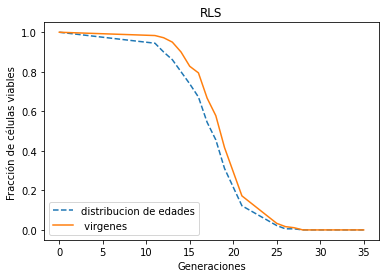

In [ ]:
plt.plot(x, viab, '--', label='distribucion de edades')# con distribucion de edades 
plt.plot(x, d, label=' virgenes')# virgenes sin distribucion 
plt.title('RLS')
plt.ylabel('Fracción de células viables ')
plt.xlabel('Generaciones')
plt.legend(loc=3)
plt.show()

## Comparacion con los datos 

RLS sin la distribución de edades (virgenes)

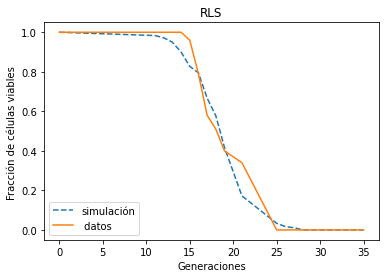

In [ ]:
plt.plot(x, d, '--', label='simulación') 
plt.plot(x, y, label=' datos ')
plt.title('RLS')
plt.ylabel('Fracción de células viables ')
plt.xlabel('Generaciones')
plt.legend(loc=3)
plt.show()

Minimos cuadrados 

In [ ]:
error=[]
for i in range(len(xa)):
  r_1=ya[i]
  r_t=(r_1-d[i])**2
  error.append(r_t)
print(error)
print(sum(error))

[0.0, 0.0002777777777777795, 0.0007716049382716057, 0.0025000000000000044, 0.009999999999999995, 0.017482716049382722, 1.9753086419752355e-05, 0.007511111111111112, 0.004593827160493819, 0.00027777777777777767, 0.02814938271604939, 0.0011111111111111111, 0.0002777777777777778, 0.0001234567901234568, 0.0, 0.0]
0.07309629629629631


RLS con la distribucion de edades

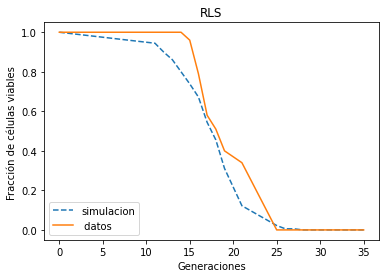

In [ ]:
plt.plot(x, viab, '--', label='simulacion') 
plt.plot(x, y, label=' datos ')
plt.title('RLS')
plt.ylabel('Fracción de células viables ')
plt.xlabel('Generaciones')
plt.legend(loc=3)
plt.show()

Minimos cuadrados 

In [ ]:
error=[]
for i in range(len(xa)):
  r_t=(ya[i]-viab[i])**2
  error.append(r_t)
print(error)
print(sum(error))

[0.0, 0.0030864197530864226, 0.009999999999999995, 0.01929012345679011, 0.03999999999999998, 0.04889012345679009, 0.0138716049382716, 0.001264197530864198, 0.0029641975308641994, 0.007901234567901238, 0.04742716049382717, 0.0004938271604938272, 3.08641975308642e-05, 3.08641975308642e-05, 0.0, 0.0]
0.19525061728395057
